<a href="https://colab.research.google.com/github/Jjmorenog/Analisis-de-texto-automatico/blob/main/Analisis_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de texto (EPI)

## 1. Instalar librerias necesasiras y veificar version de Python

In [ ]:
# Version de python sobre la cual estamos trabajando
!python --version

Python 3.10.12


In [ ]:
# Instalar el paquete 'googletrans' el cual proporciona una API para acceder a
# Google Translate y traducir texto entre diferentes idiomas de forma programática.
# La versión 3.1.0a0
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=a9aa21c0b37907ea6ab59bc09b5e421fecd2d2808974026fca31c00085b576e2
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [ ]:
# Instalar biblioteca que permite manipular archivos PDF
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Instalar biblioteca para la detección automática de idiomas de un texto
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=6380b8d6d8f973af39fd36d3d041d1969d3b779e8b82a0d7ec654f16f9cf4626
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install numpy matplotlib scikit-learn

## 2. Importar librerias necesarias

In [ ]:
import pandas as pd
pd.__version__

'2.0.3'

In [ ]:
import glob, os
# glob: Se utiliza para realizar búsquedas de archivos usando patrones de nombres de archivo.
#       Permite encontrar todos los archivos que coinciden con un patrón específico en un directorio.

# os: Proporciona una interfaz para interactuar con el sistema operativo.
#     Contiene funciones que permiten realizar operaciones comunes relacionadas con el sistema operativo,
#     como manipulación de archivos y directorios, obtención de información del sistema, etc.

import PyPDF2
from prettytable import PrettyTable #Facilita la creación de tablas con columnas alineadas
import csv #Permite escribir datos en archivos CSV
import langdetect #Permite la detección automática de idiomas de un texto
from googletrans import Translator, LANGUAGES #Permite la traducción de texto entre diferentes idiomas
import nltk #Permite la manipulación y análisis de texto
from nltk.util import ngrams #Permite generar n-gramas a partir de un texto
from nltk.stem import WordNetLemmatizer #Permite la lematización de palabras
import re #Permite realizar expresiones regulares
from collections import Counter #Permite contar elementos en una lista o diccionario
import numpy as np #Permite trabajar con matrices y operaciones numéricas
import seaborn as sns #Permite la visualización de datos estadísticos

## 3. Concectar con Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4. Buscar y listar todos los archivos con una extensión PDF en el directorio dado y sus subdirectorios.

1. Aquí, se especifica que se buscarán archivos con la extensión .pdf


      ext = "*.pdf"


2. PATH es la ruta al directorio raíz desde donde se comenzará la búsqueda de archivos. Que en este caso sera dentro del Drive en la carpeta de nombre ***Tesis Hugo y Juan Jose - Análisis texto - TD*** más especificamente en el subdirectorio ***Conjunto de Datos***
3. Luego se usa ***'os.walk(PATH)'*** para recorrer todos los directorios y subdirectorios a partir de PATH. ***os.walk*** genera una tupla (dirpath, dirnames, filenames) para cada directorio recorrido:


  *   ***dirpath*** es la ruta del directorio actual.
  *   ***dirnames*** es una lista de los nombres de los subdirectorios en el directorio actual.
  *  ***filenames*** es una lista de los nombres de los archivos en el directorio actual.

Dentro del bucle, ***glob.glob(os.path.join(dirpath, ext))*** se utiliza para encontrar todos los archivos con la extensión especificada (.pdf) en el directorio actual (dirpath). Los archivos encontrados se añaden a la lista ***files***.

In [ ]:
# Extension de los archivos
ext = "*.pdf"
PATH = "/content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos"

# Lista de archivos
files = []

# Recorre todos los directorios y subdirectorios a partir de la ruta proporcionada
for dirpath, dirnames, filenames in os.walk(PATH):
    # Utiliza glob para obtener los archivos con la extensión especificada en cada directorio
    files += glob.glob(os.path.join(dirpath, ext))

## 5. Contar archivos PDF por directorio y mostrar en una tabla

El código tiene como objetivo contar el número de archivos PDF en cada directorio y subdirectorio dentro de la carpeta ***Conjunto de Datos***, y luego mostrar estos conteos en una tabla.

In [ ]:
# Inicializa un diccionario para llevar un conteo de archivos por directorio
file_count_per_directory = {}

# Itera sobre la lista de archivos para incrementar el contador por directorio
for file in files:
    directory = os.path.dirname(file) # Obtiene el directorio de cada archivo
    file_count_per_directory[directory] = file_count_per_directory.get(directory, 0) + 1 #  Incrementa el contador por directorio en el diccionario

# Crea una tabla para mostrar la cantidad de archivos por directorio
table = PrettyTable()
table.field_names = ["Directorio", "Archivos"]

# Agrega las filas a la tabla
for directory, count in file_count_per_directory.items():
    table.add_row([directory, count])


print(table)

total_files = sum(file_count_per_directory.values())
print(f"\nTotal de archivos: {total_files}")

+--------------------------------------------------------------------------------------------------------------+----------+
|                                                  Directorio                                                  | Archivos |
+--------------------------------------------------------------------------------------------------------------+----------+
|          /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Sage          |    59    |
|         /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Scopus         |   120    |
|      /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Scopus/RUSO       |    7     |
|        /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Redalyc         |    28    |
| /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Taylor _ Francis Group |    50    |
|     /c

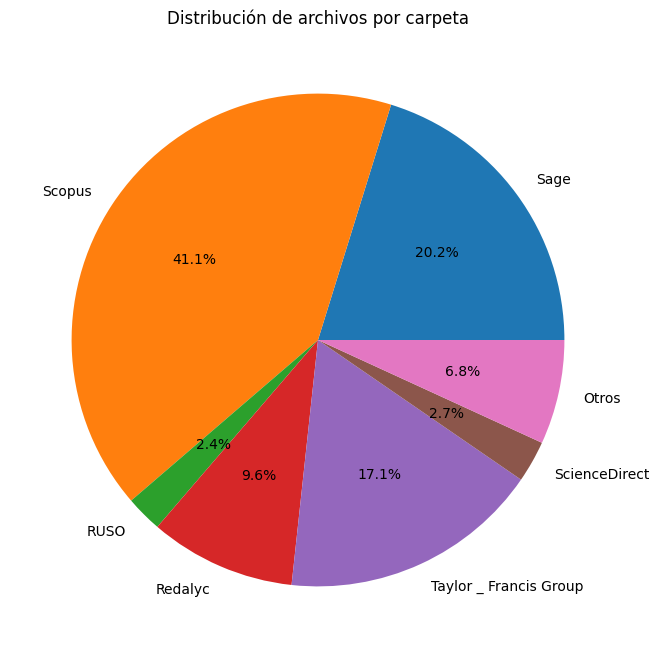

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# grafico de pastel

import matplotlib.pyplot as plt

# Obtener las etiquetas de las carpetas
carpetas = list(file_count_per_directory.keys())
carpetas_simples = [os.path.basename(x) for x in carpetas]

# Obtener los conteos de archivos
conteos = list(file_count_per_directory.values())

# Crear el gráfico de pastel
plt.figure(figsize=(15, 8))
plt.pie(conteos, labels=carpetas_simples, autopct="%1.1f%%")
plt.title("Distribución de archivos por carpeta")
plt.show()
plt.savefig('grafico_pastel.png')
# Descarga la imagen png
from google.colab import files
files.download('grafico_pastel.png')

## 6. Manipulación de la Metadata de los archivos PDF

In [ ]:
#Probar con la metadata de un archivo especifico
archivo_a_analizar = "/content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Redalyc/A mapping analysis of maintenance in Industry 4,0.pdf"


# Verifica si el archivo existe
if os.path.exists(archivo_a_analizar):
    # Obtiene información del archivo
    nombre_archivo = os.path.basename(archivo_a_analizar)
    directorio_archivo = os.path.dirname(archivo_a_analizar)
    tamaño_archivo = os.path.getsize(archivo_a_analizar)  # en bytes


    # Obtiene el número de páginas del archivo PDF
    with open(archivo_a_analizar, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        numero_de_paginas = len(pdf_reader.pages)

    # Muestra la información del archivo
    print("Información del archivo:")
    print(f"Nombre: {nombre_archivo}")
    print(f"Ruta completa: {archivo_a_analizar}")
    print(f"Directorio: {directorio_archivo}")
    print(f"Tamaño: {tamaño_archivo/1024} Megabytes")
    print(f"Número de páginas: {numero_de_paginas}")
else:
    print(f"El archivo {archivo_a_analizar} no existe.")

Información del archivo:
Nombre: A mapping analysis of maintenance in Industry 4,0.pdf
Ruta completa: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Redalyc/A mapping analysis of maintenance in Industry 4,0.pdf
Directorio: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos/Redalyc
Tamaño: 785.833984375 Megabytes
Número de páginas: 24


In [ ]:
# Crear una archivo CSV donde se almacenara la metada de los archivos pdf
# inicializar un archivo CSV
with open('metadata.csv', 'w', newline='') as csvfile:
    # Definir los nombres de las columnas (encabezados)
    fieldnames = ['Nombre del archivo', 'Ruta del archivo', 'Peso del archivo', 'Cantidad de páginas', 'Autores']
    # Crear un objeto DictWriter para escribir en el archivo CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    # Escribir los encabezados en la primera fila del archivo CSV
    writer.writeheader()

    # Iterar sobre cada archivo (sobre la lista llamada 'files' definida previamente)
    for file in files:
        # Obtener el nombre del archivo
        file_name = os.path.basename(file)

        # Obtener la ruta del archivo
        file_path = file

        # Obtener el tamaño del archivo
        file_size = os.path.getsize(file)

        # Obtener el número de páginas en el archivo PDF
        with open(file, 'rb') as f:
            pdf_reader = PyPDF2.PdfReader(f)
            num_pages = len(pdf_reader.pages)

         # Obtener los autores del archivo PDF
        pdf_reader = PyPDF2.PdfReader(open(file, 'rb'))
        info = pdf_reader.metadata
        authors = info.author

        # Write the metadata to the CSV file
        writer.writerow({
            'Nombre del archivo': file_name,
            'Ruta del archivo': file_path,
            'Peso del archivo': file_size,
            'Cantidad de páginas': num_pages,
            'Autores': authors
        })

In [ ]:
dataset = pd.read_csv(r'metadata.csv')
# mostramos las cinco primeras filas
dataset.head()

,Nombre del archivo,Ruta del archivo,Peso del archivo,Cantidad de páginas,Autores
0,mampaso-desbrow-et-al-2023-self-perception-of-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,567051,17,"Joanne Mampaso Desbrow, Ángel Vicario-Merino, ..."
1,nguyen-et-al-2023-higher-education-policy-and-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,496626,5,"Andy Nguyen, Ly Tran, and Bich-Hang Duong"
2,keiper-et-al-2023-marketing-analytics-curricul...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,698226,14,"Margaret C. Keiper, Jon Nachtigal, Joshua M. L..."
3,ye-et-al-2023-digital-marketing-and-analytics-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,356306,13,"Christine Ye, Yuna Kim, and Yoon-Na Cho"
4,allen-2020-on-the-cutting-edge-or-the-chopping...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,161099,32,Scott J. Allen


In [ ]:
# mostramos la cantidad de filas que tiene y la cantidad de columnas
dataset.shape

(292, 5)

In [ ]:
#verificamos que cargue correctamente
dataset

,Nombre del archivo,Ruta del archivo,Peso del archivo,Cantidad de páginas,Autores
0,mampaso-desbrow-et-al-2023-self-perception-of-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,567051,17,"Joanne Mampaso Desbrow, Ángel Vicario-Merino, ..."
1,nguyen-et-al-2023-higher-education-policy-and-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,496626,5,"Andy Nguyen, Ly Tran, and Bich-Hang Duong"
2,keiper-et-al-2023-marketing-analytics-curricul...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,698226,14,"Margaret C. Keiper, Jon Nachtigal, Joshua M. L..."
3,ye-et-al-2023-digital-marketing-and-analytics-...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,356306,13,"Christine Ye, Yuna Kim, and Yoon-Na Cho"
4,allen-2020-on-the-cutting-edge-or-the-chopping...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,161099,32,Scott J. Allen
...,...,...,...,...,...
287,Copia de Conceptual framework for high perform...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,560232,8,"Tippawan Meepung, Prachyanun Nilsook, Panita W..."
288,Copia de Does Team Integration Effect the Succ...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,468357,5,"Anissa Bettayeb*, Khalid Al Marri"
289,Copia de Digital transformation and digital li...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,1682627,11,Silvia Farias-Gaytan
290,Copia de Digitalization of learning resources ...,/content/drive/MyDrive/Tesis Hugo y Juan Jose ...,283606,17,NaN


In [ ]:
#identificamos los nombres de los atributos o columnas
dataset.columns

Index(['Nombre del archivo', 'Ruta del archivo', 'Peso del archivo',
       'Cantidad de páginas', 'Autores'],
      dtype='object')

In [ ]:
# características poblacionales o estadísticos
dataset.describe()

,Peso del archivo,Cantidad de páginas
count,2.920000e+02,292.000000
mean,1.245749e+06,18.113014
std,2.090905e+06,37.045308
min,1.215020e+05,3.000000
25%,4.153585e+05,10.000000
50%,6.981000e+05,15.000000
75%,1.301895e+06,20.000000
max,2.414715e+07,634.000000


In [ ]:
#Identificamos valores faltantes
dataset.isnull().sum()

Nombre del archivo       0
Ruta del archivo         0
Peso del archivo         0
Cantidad de páginas      0
Autores                133
dtype: int64

In [ ]:
# Leer el archivo CSV
df = pd.read_csv('metadata.csv')

# Mostrar el archivo CSV
print(df.head())


                                  Nombre del archivo  \
0  mampaso-desbrow-et-al-2023-self-perception-of-...   
1  nguyen-et-al-2023-higher-education-policy-and-...   
2  keiper-et-al-2023-marketing-analytics-curricul...   
3  ye-et-al-2023-digital-marketing-and-analytics-...   
4  allen-2020-on-the-cutting-edge-or-the-chopping...   

                                    Ruta del archivo  Peso del archivo  \
0  /content/drive/MyDrive/Tesis Hugo y Juan Jose ...            567051   
1  /content/drive/MyDrive/Tesis Hugo y Juan Jose ...            496626   
2  /content/drive/MyDrive/Tesis Hugo y Juan Jose ...            698226   
3  /content/drive/MyDrive/Tesis Hugo y Juan Jose ...            356306   
4  /content/drive/MyDrive/Tesis Hugo y Juan Jose ...            161099   

   Cantidad de páginas                                            Autores  
0                   17  Joanne Mampaso Desbrow, Ángel Vicario-Merino, ...  
1                    5          Andy Nguyen, Ly Tran, and Bich-Han

## 7. Procesamiento de los archivos PDF


### 1. Definir la carpeta destino para convertir todos los archivos a txt

In [ ]:
# Crear la carpeta de destino
destination_folder = "/content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)"
os.makedirs(destination_folder, exist_ok=True)


### 2. Verificar y limpiar carpeta de destino

In [ ]:
# Verificar si la carpeta de destino contiene archivos y eliminarlos si es necesario
if os.listdir(destination_folder):
    for file in os.listdir(destination_folder):
        file_path = os.path.join(destination_folder, file)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Eliminar el archivo o enlace
            elif os.path.isdir(file_path):
                os.rmdir(file_path)  # Eliminar el directorio
        except Exception as e:
            print(f"Error al eliminar el archivo {file_path}: {e}")

### 3. Recorrer directorios y listar archivos PDF

In [ ]:
# Obtener la lista de archivos PDF recorriendo el directorio y sus subdirectorios
pdf_files = []
for root, dirs, files in os.walk("/content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos"):
    for file in files:
        if file.endswith(".pdf"):
            pdf_files.append(os.path.join(root, file))

### 4. Convertir archivos de PDF a TXT

In [ ]:
# Contador de archivos convertidos
converted_count = 0

# Contador de archivos no convertidos
not_converted_count = 0

# Convertir los archivos PDF a TXT y guardarlos en la carpeta de destino
for pdf_file in pdf_files:
    try:
        # Obtener el nombre del archivo sin la extensión
        file_name = os.path.splitext(os.path.basename(pdf_file))[0]

        # Crear la ruta del archivo de texto
        txt_file = os.path.join(destination_folder, file_name + ".txt")

        # Abrir el archivo PDF
        with open(pdf_file, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)

            # Abrir el archivo de texto
            with open(txt_file, "w", encoding="utf-8") as txt:
                # Extraer el texto de cada página del PDF y escribirlo en el archivo de texto
                for page_num in range(len(pdf_reader.pages)):
                    page = pdf_reader.pages[page_num]
                    txt.write(page.extract_text())
                    txt.write("\n")  # Añadir un salto de línea entre páginas
        # Incrementar el contador de archivos convertidos
        converted_count += 1
    except Exception as e:
        # Incrementar el contador de archivos no convertidos
        not_converted_count += 1
        print(f"Error al convertir el archivo {pdf_file}: {e}")

# Imprimir el número de archivos convertidos y no convertidos
print(f"Archivos convertidos: {converted_count}")
print(f"Archivos no convertidos: {not_converted_count}")

/usr/local/lib/python3.10/dist-packages/PyPDF2/_cmap.py:142: PdfReadWarning: Advanced encoding /UniGB-UTF16-H not implemented yet
  warnings.warn(


Archivos convertidos: 292
Archivos no convertidos: 0


### 5. Eliminar los archivos que estan vacios o contienen solo espacios en blanco

In [ ]:
# Obtener la lista de archivos TXT en la carpeta de destino
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))

In [ ]:
# Obtener la lista de archivos TXT vacíos o con solo espacios en blanco
empty_files = []

for txt_file in txt_files:
    try:
        # Abrir el archivo TXT
        with open(txt_file, "r", encoding="utf-8") as f:
            text = f.read()

        # Verificar si el texto está vacío o contiene solo espacios en blanco
        if not text.strip():
            empty_files.append(txt_file)

    except Exception as e:
        print(f"Error al verificar el archivo {txt_file}: {e}")

In [ ]:
# Eliminar los archivos vacíos o con solo espacios en blanco
for file in empty_files:
    try:
        os.remove(file)
        print(f"Archivo {file} eliminado.")
    except Exception as e:
        print(f"Error al eliminar el archivo {file}: {e}")

In [ ]:
# Imprimir el número de archivos TXT restantes
txt_files = glob.glob("/content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/*.txt")
print(f"Hay {len(txt_files)} archivos TXT restantes")

Hay 292 archivos TXT restantes


### 6. Reconocer el idioma de los archivos, decir cuantos archivos hay y de que idioma

In [ ]:
# Obtener la lista de archivos TXT en la carpeta de destino
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))

In [ ]:
# Diccionario para almacenar el conteo de archivos por idioma
language_counts = {}

# Recorrer los archivos TXT y detectar el idioma
for txt_file in txt_files:
    try:
        # Abrir el archivo TXT
        with open(txt_file, "r", encoding="utf-8") as f:
            text = f.read()

        # Detectar el idioma del texto
        language = langdetect.detect(text)

        # Incrementar el contador para el idioma detectado
        language_counts[language] = language_counts.get(language, 0) + 1

    except Exception as e:
        print(f"Error al procesar el archivo {txt_file}: {e}")

In [ ]:
# Imprimir el conteo de archivos por idioma
for language, count in language_counts.items():
    print(f"Idioma: {language}, Cantidad de archivos: {count}")

# Imprimir el número total de archivos
total_files = sum(language_counts.values())
print(f"Total de archivos: {total_files}")


Idioma: en, Cantidad de archivos: 257
Idioma: hr, Cantidad de archivos: 1
Idioma: es, Cantidad de archivos: 18
Idioma: ru, Cantidad de archivos: 13
Idioma: de, Cantidad de archivos: 1
Idioma: pt, Cantidad de archivos: 2
Total de archivos: 292


<ipython-input-26-71df27bfe2c9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=languages, y=counts, palette="Set3")


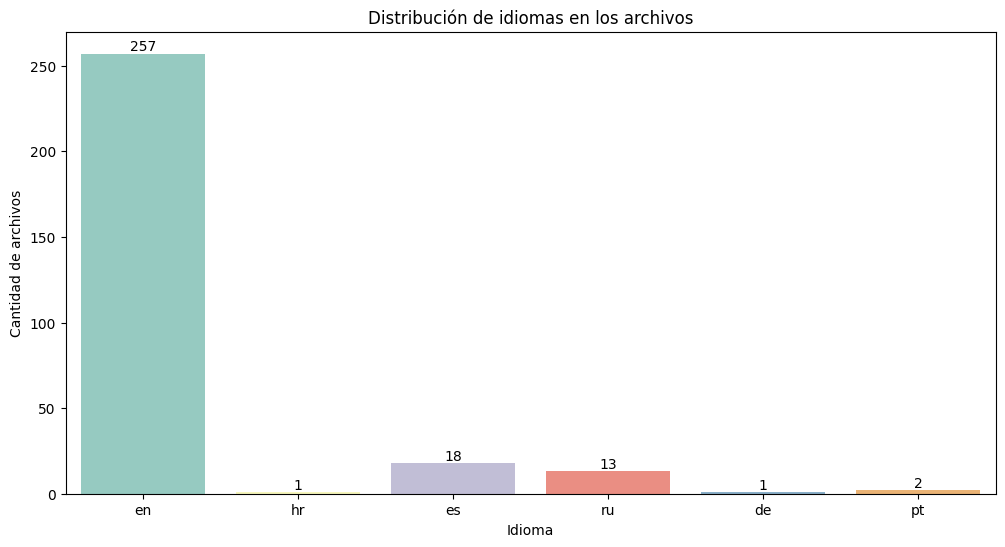

In [ ]:
# Grafico de barras por idioma
import matplotlib.pyplot as plt
import seaborn as sns
# Preparar los datos
languages = list(language_counts.keys())
counts = list(language_counts.values())

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=languages, y=counts, palette="Set3")

# Añadir etiquetas a las barras
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha="center", va="bottom")

# Añadir título y etiquetas a los ejes
plt.title("Distribución de idiomas en los archivos")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de archivos")

# Mostrar el gráfico
plt.show()


### 7. Convertir todos los archivos a un mismo idioma (English) y eliminar los archivos que no se puedan traducir

In [ ]:
# Inicializar el traductor
translator = Translator()

# Definir el idioma objetivo
target_language = "en"

# Contadores de archivos no convertibles y traducidos
unconvertible_files = {}
total_unconvertible_files = 0
total_translated_files = 0

# Función para traducir texto y manejar errores
def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text, None
    except Exception as e:
        return None, str(e)

# Convertir archivos no ingleses a inglés y reemplazar los archivos originales
for file in txt_files:
    text = ""
    try:
        # Abrir el archivo
        with open(file, "r", encoding="utf-8") as f:
            text = f.read()
    except IOError as e:
        print(f"Error al abrir o leer el archivo {file}: {e}")
        continue

    # Verificar si el texto no está vacío
    if not text.strip():
        print(f"El archivo {file} está vacío o contiene solo espacios en blanco.")
        continue

    try:
        # Detectar el idioma del texto
        detected_language = langdetect.detect(text)
    except langdetect.lang_detect_exception.LangDetectException as e:
        print(f"No se pudo detectar el idioma del archivo {file}: {e}")
        continue
    except Exception as e:
        print(f"Error inesperado al detectar el idioma del archivo {file}: {e}")
        continue

    if detected_language != "en":
        # Traducir el texto a inglés
        translated_text, error = translate_text(text, detected_language, target_language)
        if translated_text is not None:
            try:
                # Escribir el texto traducido de vuelta al archivo
                with open(file, "w", encoding="utf-8") as f:
                    f.write(translated_text)
                total_translated_files += 1  # Incrementar el contador de archivos traducidos
            except IOError as e:
                print(f"Error al escribir el archivo {file}: {e}")
            except Exception as e:
                print(f"Error inesperado al escribir el archivo {file}: {e}")
        else:
            total_unconvertible_files += 1
            unconvertible_files[file] = detected_language

# Imprimir el número de archivos TXT restantes
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))
print(f"Hay {len(txt_files)} archivos TXT restantes")

# Imprimir el número de archivos traducidos
print(f"Se tradujeron {total_translated_files} archivos.")

# Imprimir el número de archivos no convertibles y su idioma
if total_unconvertible_files > 0:
    print(f"No se pudieron convertir {total_unconvertible_files} archivos:")
    for file, language in unconvertible_files.items():
        print(f"- Archivo: {file}, Idioma: {language}")
else:
    print("Todos los archivos fueron convertidos con éxito a inglés.")


Hay 292 archivos TXT restantes
Se tradujeron 23 archivos.
No se pudieron convertir 12 archivos:
- Archivo: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/ChatGPT and AI in the Universities - An Introduction to the Near Future.txt, Idioma: ru
- Archivo: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/The University and City Images for Migration of Nonresident Students - a Regional Case.txt, Idioma: ru
- Archivo: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/Problems and Risks of Digitalization in Higher Education.txt, Idioma: ru
- Archivo: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/How University Teachers View the Digital Transformation of Higher Education.txt, Idioma: ru
- Archivo: /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/Project approach to the impl

In [ ]:
# Eliminar los archivos que no se pudieron traducir

# Obtener la lista de archivos no convertibles
unconvertible_files = [file for file, _ in unconvertible_files.items()]

# Eliminar los archivos no convertibles
for file in unconvertible_files:
    try:
        os.remove(file)
    except Exception as e:
        print(f"Error al eliminar el archivo {file}: {e}")

# Imprimir el número de archivos TXT restantes
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))
print(f"Hay {len(txt_files)} archivos TXT restantes")


Hay 280 archivos TXT restantes


### 8. Limpieza de archivos TXT

In [ ]:
# Obtener la lista de archivos TXT en la carpeta de destino
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))

In [ ]:
# Lista de artículos
articles = set(["a", "an", "the", "of", "and", "to", "in", "for", "that", "as", "on", "is", "with", "de",
                "this", "these", "by", "al", "from", "et", "la", "their", "y", "s", "at", "or", "e", "m", "en", "j",
                "c", "p", "el", "d", "t", "r", "n", "o", "b", "l", "pp", "las", "los", "h", "que", "doi"
                "g","se","than","them","para","k","con","f","v","del","vol","so","ict","un","x","por","dt","if",
                "una","ed","es","eg","w","th","su","tion","then","u","und","z","ai","ie","di","der","ms","re","st",
                "lo","ir","per","uso","da","etc","peer","com","nd","q","van","issn","hei","eds","pro","gap","end","em",
                "rst","smes","me","res","aim","ha","ee","org","sus", "sin","sc","bi","ma", "aid", "chi","aos","dif","esto",
                "cr","sa","ng","ya","te","nm","ec","med","nor","vi","ss","cf","um","dig","cmo","les","tal","sd","cual","ns",
                "mc","cc","ce","ac","nt","km","ct","iii","ne","sig","wu","ei","cada","pr","ef","ned","ao","soc","er","ts","ar",
                "lot","fc","pu","ml","rq","sta","des","os","le","di","fr","vs","ca","td","pa","ii","son","stu","lee","pe","li",
                "dr","ser","eld","von","sci","rd","ea","ve","http","https"])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
# Función para identificar y preservar n-gramas
def preserve_ngrams(text, n=3):
    words = nltk.word_tokenize(text)
    n_grams = set()
    for i in range(1, n+1):
        for gram in ngrams(words, i):
            n_grams.add(' '.join(gram))
    return n_grams

# Función para limpiar el texto
def clean_text(text, ngrams_set):
    # Eliminar enlaces
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'www\S+', '', text)
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y signos gramaticales, pero preservar los espacios
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Eliminar caracteres no alfanuméricos
    texto = re.sub(r'\W', ' ', text)
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar hashtags
    texto = re.sub(r'#\S+', '', text)
    # Eliminar emojis
    texto = texto.encode('ascii', 'ignore').decode('ascii')
    # Eliminar espacios extra
    texto = re.sub(r'\s+', ' ', text).strip()

    # Tokenizar el texto
    words = nltk.word_tokenize(text)

    # Eliminar artículos y preservar n-gramas
    cleaned_words = []
    i = 0
    while i < len(words):
        found_ngram = False
        for n in range(3, 0, -1):  # Buscando de trigramas a unigramas
            if i + n <= len(words):
                gram = ' '.join(words[i:i+n])
                if gram in ngrams_set and all(word not in articles for word in words[i:i+n]):
                    cleaned_words.append(gram)
                    i += n
                    found_ngram = True
                    break
        if not found_ngram:
            if words[i] not in articles:
                cleaned_words.append(words[i])
            i += 1

    # Eliminar espacios en blanco redundantes y formar el texto limpio
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text


# Contador de archivos limpiados y bolsa de palabras
cleaned_files_count = 0
word_bag = Counter()

# Limpiar archivos TXT y reemplazar el contenido original
for file in txt_files:
    text = ""
    try:
        # Abrir el archivo
        with open(file, "r", encoding="utf-8") as f:
            text = f.read()
    except IOError as e:
        print(f"Error al abrir o leer el archivo {file}: {e}")
        continue

    # Preservar n-gramas
    ngrams_set = preserve_ngrams(text)

    # Limpiar el texto
    cleaned_text = clean_text(text, ngrams_set)

    try:
        # Escribir el texto limpio de vuelta al archivo
        with open(file, "w", encoding="utf-8") as f:
            f.write(cleaned_text)
        cleaned_files_count += 1

        # Actualizar la bolsa de palabras
        word_bag.update(cleaned_text.split())
    except IOError as e:
        print(f"Error al escribir el archivo {file}: {e}")
    except Exception as e:
        print(f"Error inesperado al escribir el archivo {file}: {e}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Imprimir el número de archivos TXT restantes
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))
print(f"Hay {len(txt_files)} archivos TXT restantes")

# Imprimir el número de archivos limpiados
print(f"Se limpiaron {cleaned_files_count} archivos TXT")

Hay 280 archivos TXT restantes
Se limpiaron 280 archivos TXT


### 9. Lematizar los archivos TXT

In [ ]:
# Descargar recursos de nltk necesarios
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Obtener la lista de archivos TXT en la carpeta de destino
txt_files = glob.glob(os.path.join(destination_folder, "*.txt"))

In [ ]:
# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Procesar cada archivo
for file in txt_files:
    # Abrir el archivo en modo lectura
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    # Tokenizar el texto en palabras
    words = nltk.word_tokenize(text)

    # Lematizar cada palabra
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Actualizar la bolsa de palabras
    word_bag.update(lemmatized_words)

    # Unir las palabras lematizadas en una cadena de texto
    lemmatized_text = " ".join(lemmatized_words)

    # Abrir el archivo en modo escritura para sobreescribir el contenido con el texto lematizado
    with open(file, "w", encoding="utf-8") as f:
        f.write(lemmatized_text)

# Imprimir mensaje de éxito
print("Los archivos han sido lematizados con éxito.")


Los archivos han sido lematizados con éxito.


### 10. Bolsa de Palabras (BoW)

In [ ]:
len(word_bag)

98128

In [ ]:
# Obtener las 20 palabras más comunes en word_bag
word_bag.most_common(20)

[('digital', 18670),
 ('education', 14549),
 ('student', 12776),
 ('learning', 12380),
 ('are', 11268),
 ('it', 11046),
 ('technology', 10142),
 ('university', 9992),
 ('be', 8893),
 ('research', 8365),
 ('study', 7321),
 ('higher', 6466),
 ('online', 6193),
 ('process', 6034),
 ('model', 6001),
 ('information', 5974),
 ('wa', 5900),
 ('can', 5786),
 ('have', 5767),
 ('data', 5704)]

In [ ]:
# guardar dentro de un datframe  word_bag

import pandas as pd

# Convert the Counter object to a dictionary
word_bag_dict = dict(word_bag)

# Create a DataFrame from the dictionary
word_bag_df = pd.DataFrame.from_dict(word_bag_dict, orient='index', columns=['Count'])

# Sort the DataFrame by the 'Count' column in descending order
word_bag_df = word_bag_df.sort_values(by='Count', ascending=False)


             Count
digital      18670
education    14549
student      12776
learning     12380
are          11268
it           11046
technology   10142
university    9992
be            8893
research      8365
study         7321
higher        6466
online        6193
process       6034
model         6001
information   5974
wa            5900
can           5786
have          5767
data          5704


<ipython-input-92-88faf5d655af>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette="Set3")


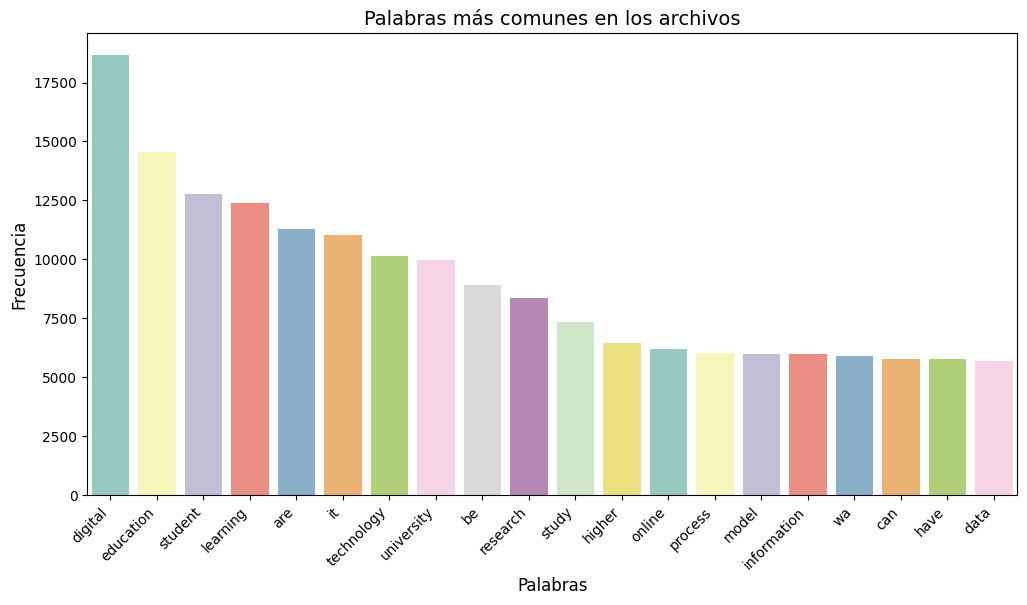

In [ ]:
# grafico de barras con las 20 palabras mas comunes

# Get the top 20 most common words
top_20_words = word_bag_df.head(20)

# Prepare the data for the bar plot
words = top_20_words.index.to_list()
counts = top_20_words['Count'].to_list()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=counts, palette="Set3")

# Add labels and title
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Palabras más comunes en los archivos", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### 1. Matriz de características X donde cada fila representa un archivo txt y cada columna representa la presencia o ausencia de una palabra que aparece en la bolsa de palabras en ese archivo txt

In [ ]:
# Obtener la lista de palabras de la bolsa de palabras
import csv
words = word_bag.keys()

# Crear una matriz de características vacía
X = np.zeros((len(txt_files), len(words)))

# Recorrer los archivos txt y las palabras de la bolsa de palabras
for i, file in enumerate(txt_files):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()
    for j, word in enumerate(words):
        if word in text:
            X[i, j] = 1
# Comprobación de dimensiones
assert X.shape == (len(txt_files), len(words)), "Dimensiones de la matriz no coinciden con los datos"


In [ ]:
# Convertir la matriz término-documento a un DataFrame de Pandas
X_df = pd.DataFrame(X, columns=words)

# Guardar el DataFrame en un archivo CSV
file_path = f'{destination_folder}/X.csv'
# Guardar el DataFrame en un archivo CSV dentro de Google Drive
X_df.to_csv(file_path, index=False)
print(f"Archivo guardado en {file_path}")

Archivo guardado en /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/X.csv


In [ ]:
# Tamaño de la matriz de características
X.shape

(280, 93952)

In [ ]:
intersection_matrix = X
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(intersection_matrix)
x = x.style.background_gradient(cmap=cm)
display(x)

In [ ]:
# matriz termino documento

import numpy as np
import csv

# Obtener la lista de palabras de la bolsa de palabras
words = word_bag.keys()

# Crear una matriz termino documento vacía
document_term= np.zeros((len(txt_files), len(words)))

# Recorrer los archivos txt y las palabras de la bolsa de palabras
for i, file in enumerate(txt_files):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()
    for j, word in enumerate(words):
        # Contar la frecuencia de cada palabra en cada documento
        document_term[i, j] = text.count(word)

# Comprobación de dimensiones
assert document_term.shape == (len(txt_files), len(words)), "Dimensiones de la matriz término-documento no coinciden con los datos"

In [ ]:
# Convertir la matriz término-documento a un DataFrame de Pandas
document_term_df = pd.DataFrame(document_term, columns=words)

# Guardar el DataFrame en un archivo CSV
file_path = f'{destination_folder}/document_term.csv'
# Guardar el DataFrame en un archivo CSV dentro de Google Drive
document_term_df.to_csv(file_path, index=False)
print(f"Archivo guardado en {file_path}")

Archivo guardado en /content/drive/MyDrive/Tesis Hugo y Juan Jose - Análisis texto - TD/Conjunto de Datos (txt)/document_term.csv


In [ ]:
# Tamaño de la matriz termino documento
document_term.shape

(280, 93952)

In [ ]:
cm = sns.light_palette("green", as_cmap=True)
document_term = document_term_df.style.background_gradient(cmap=cm)
display(document_term)

In [ ]:
# prompt: Implementa t-Distributed Stochastic Neighbor Embedding (t-SNE) donde cada color represente un archivo de txt

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE model with 2 dimensions
model = TSNE(n_components=2, learning_rate='auto',
             init='random', perplexity=30, n_iter=5000)

# Fit the model to the data
transformed = model.fit_transform(X)

# Assign colors based on the file index
colors = [i for i in range(len(txt_files))]

# Create a scatter plot with colored points
plt.figure(figsize=(10, 8))
plt.scatter(transformed[:, 0], transformed[:, 1], c=colors)
plt.title("t-SNE Representation of Documents")
plt.show()


NameError: name 'X' is not defined

In [ ]:
#import networkx as nx
#import matplotlib.pyplot as plt
#from collections import Counter

# Crear un grafo vacío
#G = nx.Graph()

# Contador de co-ocurrencias de palabras
#word_cooccurrences = Counter()

# Recorrer los archivos txt y las palabras de la bolsa de palabras
#for file in txt_files:
 #   with open(file, "r", encoding="utf-8") as f:
  #      text = f.read()
   #     words = text.split()
        # Actualizar el contador de co-ocurrencias de palabras
    #    word_cooccurrences.update({(word1, word2) for i, word1 in enumerate(words) for j, word2 in enumerate(words) if i != j})

# Agregar las aristas al grafo
#for (word1, word2), weight in word_cooccurrences.items():
 #   G.add_edge(word1, word2, weight=weight)

# Visualizar la red
#plt.figure(figsize=(12, 8))
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color="skyblue", font_size=10, edge_color="gray")
#plt.savefig('word_network.png')  # Guardar la visualización del grafo como una imagen PNG
#plt.show()

# Identificar comunidades de palabras relacionadas
#communities = nx.community.greedy_modularity_communities(G)
#for community in communities:
 #   print(f"Community: {community}")


In [ ]:
# PCA
# Corregir y estar pendiente con el idioma del archivo, y las palabras compuestas
# n-gramas
# probabilidad de aparición de dos palabras en un texto
# Procesos de agragación
# Procesos de extracción
# Procesos de análisis
# Procesos de clasificación
# Conocer el tamño de la población
# Oneshort learning